## Predicting Cryptocurrency Prices with Regression Analysis

#### The aim of this project is to gain practical experience in handling a regression problem by building models to predict the price of a cryptocurrency. As cryptocurrency markets are highly volatile and influenced by multiple factors, predicting their prices requires a thoughtful approach to data analysis and model selection. For this project, I’ll explore different feature engineering and pre-processing techniques to optimize model performance. I’ll begin by constructing a linear regression model, examining how well it captures trends, and possibly experimenting with other regression techniques to push predictive accuracy further. Altough I could predict for the future I want to gauge just how well my model predicts. In order to do this I will be prediciting prices for 2019 and comparing with the actual this will give us better insight on the predicitive capabilities of my model!
* Data was taken from yfinance (Yahoo Finance) https://finance.yahoo.com/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAFrDXzo9HDhc2-KjBxhuvWVClU3MRvryVRC02rLLZOWfnXMxlQmmBYEXJwIiRNI7AIEVWWQa1nip7Y7lrSygIMiZoGdJY77r3RbaEf5-DNXPebzZCDZFBqyGp5xxeSSEY-ds1ZNyMik_8nkyyL0G21mI6GLOLhX7syGtgmyTO1e1
  

For those who are new to the world of cryptocurrency, let's start with a brief introduction before diving into the specifics. Cryptocurrency, often referred to simply as 'crypto,' is a digital or virtual form of currency that relies on cryptography for security. Unlike traditional currencies issued by governments and regulated by central banks, cryptocurrencies operate on decentralized networks using blockchain technology. Okay but what even is that? This means that a crytpo like "Ethereum" operates on a network of computers (nodes) spread worldwide rather than relying on a single, central authority, like a bank or corporation.  This structure allows for transparency, security, and independence from central authorities.

In addition to serving as digital money, cryptocurrencies have a range of applications that go beyond just buying and selling. For instance, they enable fast, low-cost global payments, provide financial services for those without access to traditional banking, and support a variety of online services through smart contracts. Smart contract you say? What makes it so smart? Smart contracts are a self-executing program or code that runs on a blockchain, automatically enforcing and executing the terms of an agreement when certain conditions are met. With crypto, we see innovations across fields like finance, supply chain management, gaming, and art through NFTs (non-fungible tokens).

## What is Regression

Regression is a statistical approach for predicting a continuous outcome variable using one or more input features. In a regression model, the goal is to understand the relationship between the dependent or target variable and independent variables. Linear regression, is one the simplest type of regression. It works by fitting a straight line through data points in a way that minimizes the total distance of each point from the line. The mathematical formula for this relationship is:
y=β0 +β1 x+ϵ where y is the dependent variable, β0 is the y-intercept. β1 is the coefficient of the independent variable 𝑥 and the error term is ϵ is This formula lets us predict y based on the value of x. In this project, I began with linear regression as a baseline model, then experimented with other techniques like MSE, R2 score and Random Forest.

In [136]:
%pip install yfinance
%pip install plotly
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [138]:
import yfinance as yf #we will be pulling the info for our historical ETH(Ethereum Crypto) prices from this 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go 

In [140]:
ticker = 'ETH-USD'
eth_data = yf.download('ETH-USD', start='2017-11-15', end='2021-01-01')
# Creating the date ranges that we are intrested in but we will be prediciting 2019 
print(eth_data)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                        ETH-USD     ETH-USD     ETH-USD     ETH-USD   
Date                                                                        
2017-11-15 00:00:00+00:00  333.356995  333.356995  340.911987  329.812988   
2017-11-16 00:00:00+00:00  330.924011  330.924011  336.158997  323.605988   
2017-11-17 00:00:00+00:00  332.394012  332.394012  334.963989  327.523010   
2017-11-18 00:00:00+00:00  347.612000  347.612000  349.615997  327.687012   
2017-11-19 00:00:00+00:00  354.385986  354.385986  371.290985  344.739990   
...                               ...         ...         ...         ...   
2020-12-27 00:00:00+00:00  682.642334  682.642334  711.393555  628.334961   
2020-12-28 00:00:00+00:00  730.397339  730.397339  745.877747  683.205811   
2020-12-29 00:00:00+00:00  731.520142  731.520142  737.952881  692.149414   
2020-12-30 00:00:00+00:00  751.618958  751.618958  754.303223  720.988892   

Here we notice an issue my start date is supposed to be January of 2017 instead it is showing start from November 2017. I have tried changing to starting date to see if it was some issue there however that does snot seem to be the issue. I belive th issue is from yfinance themselves and the way the data is being downloaded. When changing the start to 2016-01-01 it still reverts back to November of 2017 Ibelive irregardless of the case it will alwasy start from Novemeber fof 2017. Since this was the best data source I could find in terms of historical data I am going to stick to it. We still get November and December of 2017 to work with aslongside the other years of intrest.

*Now lets filter the data to exclude 2019 prices*

In [144]:
#creating new df where 2019 is exempt
eth_filtered = eth_data[(eth_data.index < '2019-01-01') | (eth_data.index >= '2020-01-01')].copy()


In [146]:
eth_filtered.isna().sum()

Price      Ticker 
Adj Close  ETH-USD    0
Close      ETH-USD    0
High       ETH-USD    0
Low        ETH-USD    0
Open       ETH-USD    0
Volume     ETH-USD    0
dtype: int64

In [148]:
eth_data.columns
# Checking this so we can access the values correctly

MultiIndex([('Adj Close', 'ETH-USD'),
            (    'Close', 'ETH-USD'),
            (     'High', 'ETH-USD'),
            (      'Low', 'ETH-USD'),
            (     'Open', 'ETH-USD'),
            (   'Volume', 'ETH-USD')],
           names=['Price', 'Ticker'])

Just checking to see if there are any null values this also shows us the relative features in our data!

*Ethereum was created in 2013 so it is a fairly new crypto in regards to the majority of cryptocurrencies predecessors Bitcoin. To give you an idea of how the prices for Ethereum have been trending over the last couple of years. Let's create a plot to grasp a better understanding!*

Text(0, 0.5, 'Prices in USD')

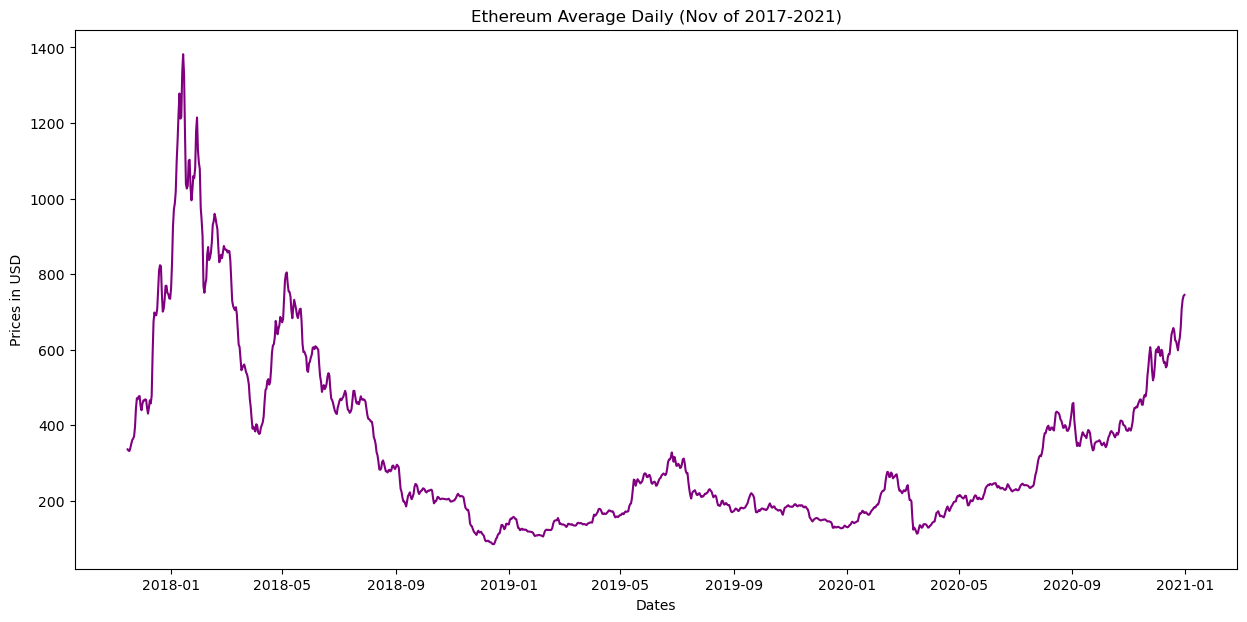

In [152]:
# calculate the average price we are going to create a new field in our first eth_data 
eth_data['Avg_Price'] = (eth_data['Open'] + eth_data['Close']) / 2 # this will get us our average price

#creating figure
plt.figure(figsize=(15,7))
plt.title('Ethereum Average Daily (Nov of 2017-2021)')
plt.plot(eth_data.index,eth_data['Avg_Price'], color='purple')
plt.xlabel('Dates')
plt.ylabel('Prices in USD')


Here we can see that around the first couple months in 2018, the price for ethereum soared close to $1,400$ for one (Ether). It then starts tapering down, and towards the beginning of 2021 we can see it start to rise again. Today's opening price for Ethereum on Nov 1st was $2,549.89$. That's more than a $1,000$ difference from its peak in 2018!


*Lets start our first experiment! In this we will be trying to see if we can predict wether the closing price for Ethereum will be higher than it's opening price based on the features in our DF. We will be classifying these reuslts into binary "0" the close will be below the opening price or "1" the close will be above the opening price. Let's go ahead and import the necessary modules.*

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [158]:
# making another feature to hold our expected binary predictions
eth_data['CloseAboveOpen'] = (eth_data['Close'] > eth_data['Open']).astype(int)
# We are using parenthese for comparison this will give us T or F values using ".astype(int)" will turn the T or F into a binary response for us

# Creating another feature for us to gauge the fluctuation for daily price based on high and low this will be used in the testing 
eth_data['Daily_Range'] = eth_data['High'] - eth_data['Low']

In [160]:
# lets create our testing variables
X = eth_data[['Open', 'Close','High','Low','Daily_Range']]
# below is what we are trying to predict
y = eth_data['CloseAboveOpen']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
# training our model 
model.fit(X_train, y_train)

# generating predictions on the test set
y_pred = model.predict(X_test)

# the results now holds DF of our actual and predicited
results = X_test.copy()
results['Actual_CloseAboveOpen'] = y_test
results['Predicted_CloseAboveOpen'] = y_pred

In [164]:
results.head()


Price,Open,Close,High,Low,Daily_Range,Actual_CloseAboveOpen,Predicted_CloseAboveOpen
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,,,
Date,,,,,,,
2018-04-22 00:00:00+00:00,606.119019,621.859985,640.767029,593.869019,46.898010,1,1
2020-10-31 00:00:00+00:00,382.820038,386.590332,393.010132,381.295258,11.714874,1,0
2018-09-02 00:00:00+00:00,295.453003,294.371002,298.686005,290.925995,7.760010,0,0
2019-05-07 00:00:00+00:00,172.427277,169.798660,180.394409,169.694717,10.699692,0,0
2018-11-17 00:00:00+00:00,175.360001,174.001007,175.850998,172.869003,2.981995,0,0


We can see we have our actual and predicited values in binary let's just gauge how accurate our model is. 

In [167]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


*So not 100% but .73 is still a decent accuracy score! Let's create a confusion matrix to understand this better.* 

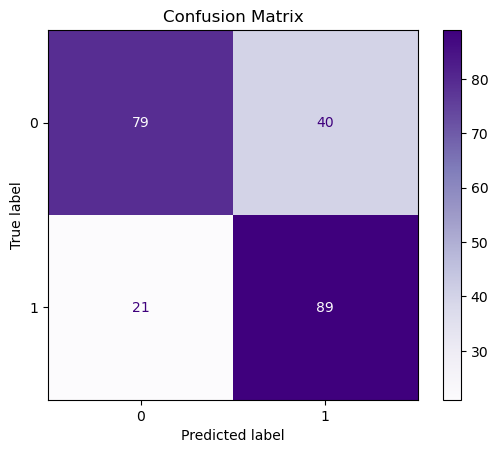

In [170]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

#plot the confusion matrix
disp.plot(cmap=plt.cm.Purples)
plt.title('Confusion Matrix')
plt.show()

In terms of true positives and true negatives getting the accuracy score does give us .73 ..... TP+TN/TP+TN+FP+FN or 89+93/89+23+25+93 

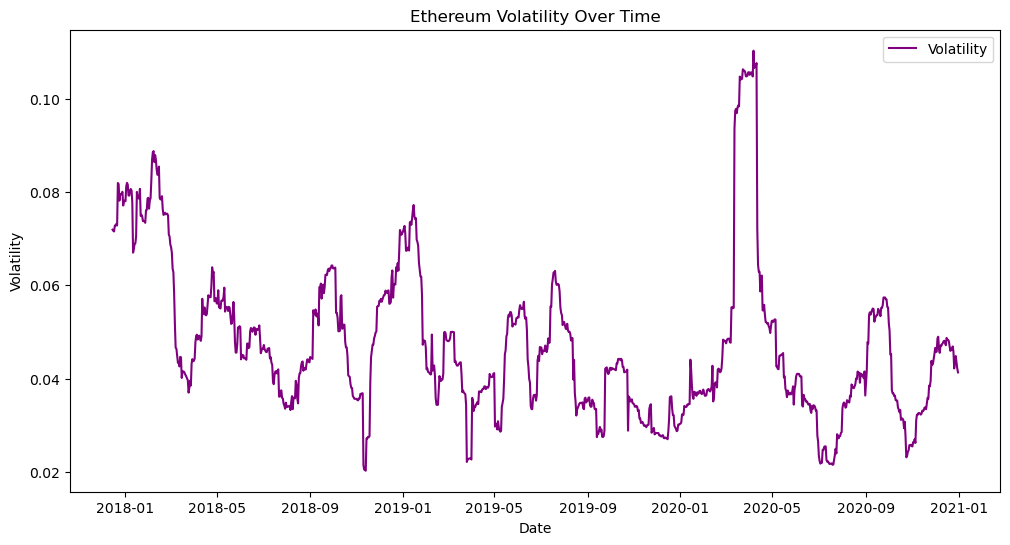

In [173]:

#calculate daily returns using 'Adj Close' prices
eth_data['Daily Return'] = eth_data[('Adj Close', 'ETH-USD')].pct_change()

eth_data['Volatility'] = eth_data['Daily Return'].rolling(window=30).std()
# Plot the volatility over time
plt.figure(figsize=(12,6))
plt.plot(eth_data.index, eth_data['Volatility'], color='purple', label='Volatility')
plt.title('Ethereum Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

Let’s analyze these results. The percentages on the side represent standard deviations. Lower standard deviations indicate less volatility, which can be favorable for long-term investors as it suggests stability, helping you decide whether to invest in stocks or crypto.

In 2020, around the fifth month, we see a spike in volatility, coinciding with the peak of the COVID-19 pandemic, which significantly impacted markets and caused Ethereum prices to drop. Although not shown here, Ethereum rebounded dramatically in 2021-22, nearly increasing tenfold in price.

Higher volatility can have different implications: for some, it might mean potential losses, while for larger investors, it could present an opportunity to increase their holdings in certain investments.

*Now, for our final visual, let’s see how well we can create a predictive model based on our data to assess prices for 2019!*

At the very beginning when we plotted out the average for Ethereum prices I made a feature whihc contains the average prices for Ehtereum. This is the feature I plan on predicting for our model, below I will implement another averge prices but for our filtered Ethereum data frame which does not contain the year 2019.

In [178]:
# average price feature creation for filtered eth df had to use ".loc" because python was throwing an error
#becuase we were slicing the data frame and then trying to test with it 
eth_filtered.loc[:, 'Avg_Price'] = (eth_filtered['Open'] + eth_filtered['Close']) / 2
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Avg_Price'  # Define target as a single string

# creating a training split 
X_train_two = eth_filtered[features].values
y_train_two = eth_filtered[target].values

# testing with filtered data from our original DF
X_test_two = eth_data[(eth_data.index >= '2019-01-01') & (eth_data.index < '2020-01-01')][features].values
y_test_two = eth_data[(eth_data.index >= '2019-01-01') & (eth_data.index < '2020-01-01')][target].values


In [180]:
 #Initialize the model
model_two = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_two.fit(X_train_two, y_train_two)

# Make predictions
y_pred_two = model_two.predict(X_test_two)

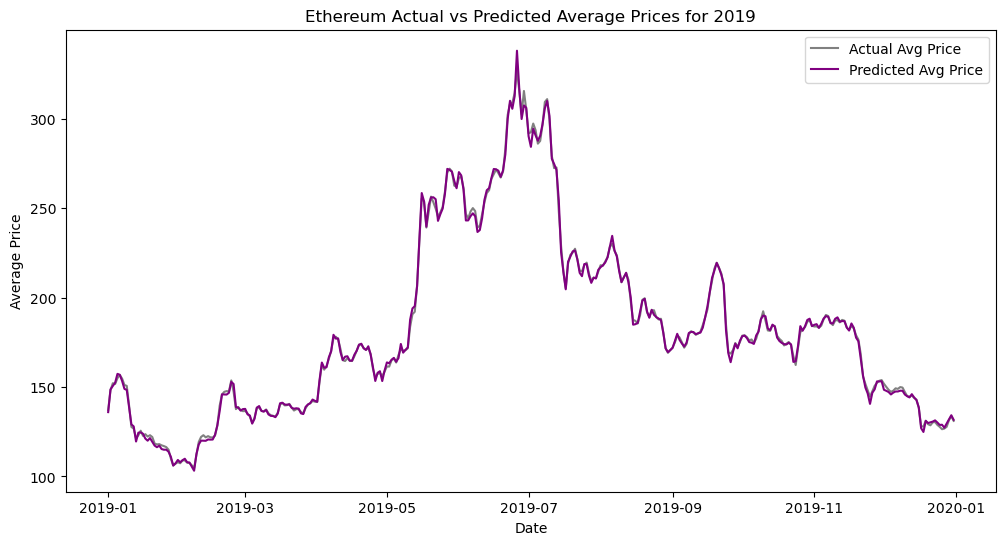

In [182]:
plt.figure(figsize=(12, 6))

# plottig actual average prices in grey
plt.plot(
    eth_data[(eth_data.index >= '2019-01-01') & (eth_data.index < '2020-01-01')].index,
    y_test_two,
    color='grey',
    label='Actual Avg Price'
)

# plotting predicted average prices in purple
plt.plot(
    eth_data[(eth_data.index >= '2019-01-01') & (eth_data.index < '2020-01-01')].index,
    y_pred_two,
    color='purple',
    label='Predicted Avg Price'
)

plt.title('Ethereum Actual vs Predicted Average Prices for 2019')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()


### WOW the model seems to have predicted the actual average spot on!!!!

Lets look into the r-sqaured and mse to asses the accuracy more in depth.

In [186]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate R-squared score
r2 = r2_score(y_test_two, y_pred_two)
print(f'R-squared: {r2:.2f}')

mse = mean_squared_error(y_test_two, y_pred_two)

print(f'Mean Squared Error (MSE): {mse:.2f}')

R-squared: 1.00
Mean Squared Error (MSE): 3.05


*So what does this even mean? an r^2 of 1.00 means that the model perfectly explains the variance in the target variable average price. and the MSE of 3.05 shows that the average between the squared differences in y-actual and our y-pred is still quite low. Although I do not think my model is really this accurate there could be some overfitting. This was still a great learning experience.*

In [189]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [190]:
import statsmodels.api as sm
import numpy as np 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor

# check for multicollinearity using VIF
# add a constant column for VIF calculation
X_with_const = sm.add_constant(X_train_two)
vif = pd.DataFrame()
vif["Feature"] = features
vif["VIF"] = [variance_inflation_factor(X_with_const, i+1) for i in range(len(features))]

print(vif)

#calculate RMSE

rmse = np.sqrt(mean_squared_error(y_test_two, y_pred_two))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

#initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# train and evaluate models
for name, model in models.items():
    model.fit(X_train_two, y_train_two)
    y_pred = model.predict(X_test_two)
    rmse = np.sqrt(mean_squared_error(y_test_two, y_pred))
    print(f'{name} RMSE: {rmse:.2f}')

  Feature         VIF
0    Open  315.188832
1    High  624.601089
2     Low  210.018143
3   Close  438.508080
4  Volume    1.067191
Root Mean Squared Error (RMSE): 1.75
Linear Regression RMSE: 0.00
Lasso Regression RMSE: 0.24
Gradient Boosting RMSE: 3.52


Based on these results we see that the model is signifcantly overfitting. The VIF values firstly are our indicators showing that each feature for our DF is well above 10. Suggesting that the features are highly coorelated leading to the overfitting of the model. Alongside this when the  RMSE is zero on the test set, it indicates that the model has “fit” the training data too closely reconfirming the overfitting theory. 

### Principal Component Analysis (PCA) testing

Since I do want to keep the features (Open, High, Low, and Close). Instead of say creating composite features that are a combination of multiple features. Another option is to use Principal Component Analysis PCA to reduce them to a smaller number of uncorrelated components. This  transforms the features into new, combined features that capture some of the variance in the data.

In [206]:
from sklearn.decomposition import PCA

#apply pca to the price-related columns only
pca = PCA(n_components=2)  #start with 2 components to reduce dimensionality
price_features = eth_filtered[['Open', 'High', 'Low', 'Close']]
pca_features = pca.fit_transform(price_features)

#add these new components to the dataset
eth_filtered['PCA1'] = pca_features[:, 0]
eth_filtered['PCA2'] = pca_features[:, 1]

#update features list to include pca components and other relevant features
features = ['PCA1', 'PCA2', 'Volume']

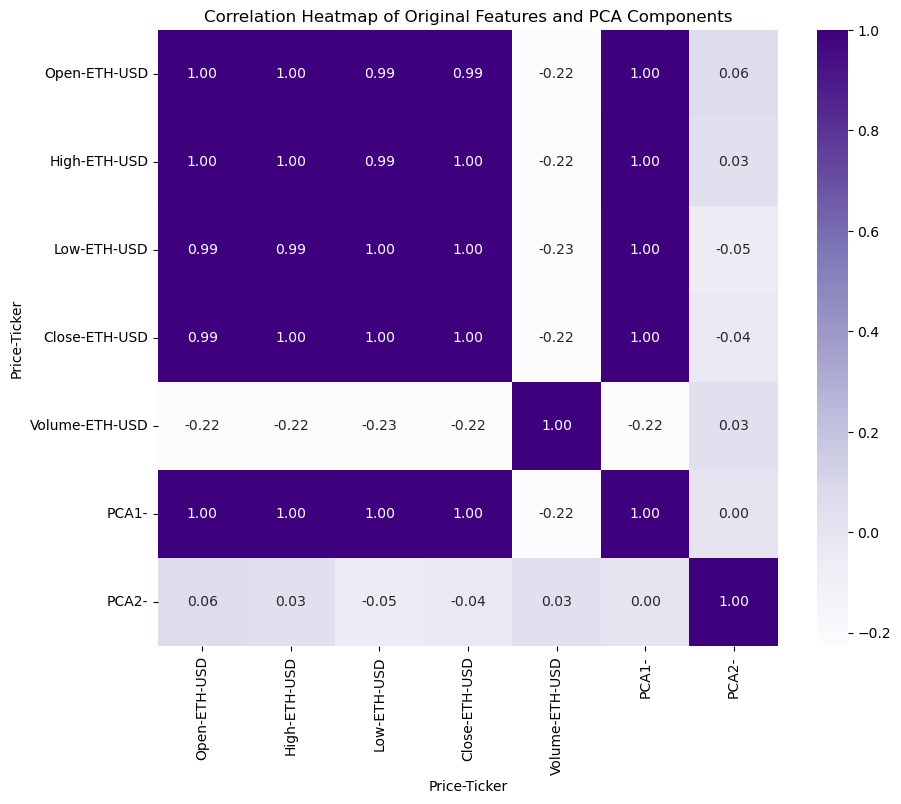

In [214]:
corr = eth_filtered[['Open', 'High', 'Low', 'Close', 'Volume', 'PCA1', 'PCA2']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Purples', fmt=".2f")
plt.title("Correlation Heatmap of Original Features and PCA Components")
plt.show()

In summary, this coorelation heatmap shows that PCA has effectively reduced the dimensionality of the price-related features into one dominant component PCA1, which captures almost all the price variance, while also producing an independent component PCA2 that may capture additional distinctions. This reduction in dimensionality can help simplify predictive modeling while retaining the core information from the price data.

## Conclusion

Overall, this was a fantastic learning opportunity that I genuinely enjoyed. I faced a challenge with the final visualization when creating the predictive model because the RandomForestRegressor does not accept null or NaN values. Initially, dropping these values didn’t work. I then realized that y-finance provided data starting from November 2017, not January. After adjusting the index dates, the model fits the data properly. The positives of this project include the ability to analyze past and future trends, gain more knowledge about crypto, and understand financial aspects like investment volatility from a statistical standpoint. Although I usually consider volatility before investing, this project provided a deeper, statistical perspective. One potential downside is that my last model was very accurate perhaps even suspiciously accurate. I plan to test it further to ensure it’s not overfitting. Nonetheless, this project was an excellent way to learn about linear regression, time series analysis, and dive deeper into sci-kit-learn and machine learning techniques.